 Real Time Data Proccessing and Display using Python.

Data Acquisition

In [2]:
import requests
import websocket
import pandas as pd


Data Processing

In [4]:
import numpy as np
from scipy import stats 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash
from dash import dcc, html
import bokeh.plotting as bkp



In [ ]:
import streamlit as st 
from flask import Flask
import dash
from dash import dcc, html

Real time Plotting

In [9]:
import pandas as pd
filename=r'C:\Users\compu\Downloads\all-data.csv'
file=pd.read_csv(filename,encoding='ISO-8859-1',header=None)
print(file.head())

          0                                                  1
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


<function matplotlib.pyplot.show(close=None, block=None)>

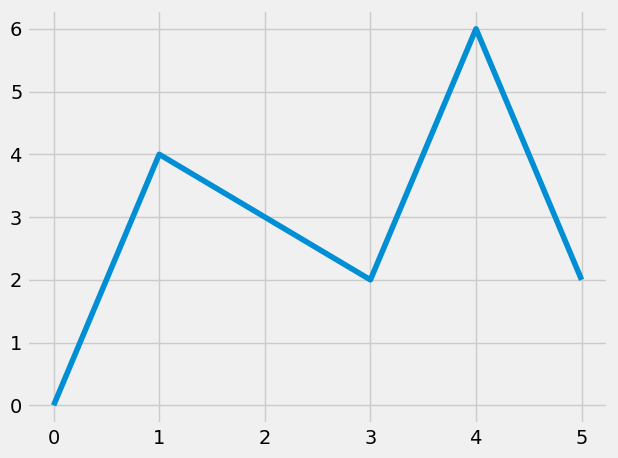

In [12]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

xvals= [0,1,2,3,4,5]
yvals= [0,4,3,2,6,2]

plt.plot(xvals,yvals)

plt.tight_layout()
plt.show


In [1]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



plt.style.use('fivethirtyeight')

xvals= []
yvals= []

index= count()

def animate(i):
    xvals.append(next(index))
    yvals.append(random.randint(0,7))

    plt.cla()
    plt.plot(xvals,yvals)
    
    
    ani = FuncAnimation(plt.gcf(), animate, frames=None, interval=1000, cache_frame_data=False)


plt.tight_layout()
plt.show()
HTML(ani.to_jshtml())


<Figure size 640x480 with 0 Axes>

NameError: name 'ani' is not defined

C:\Users\srees\anaconda3\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


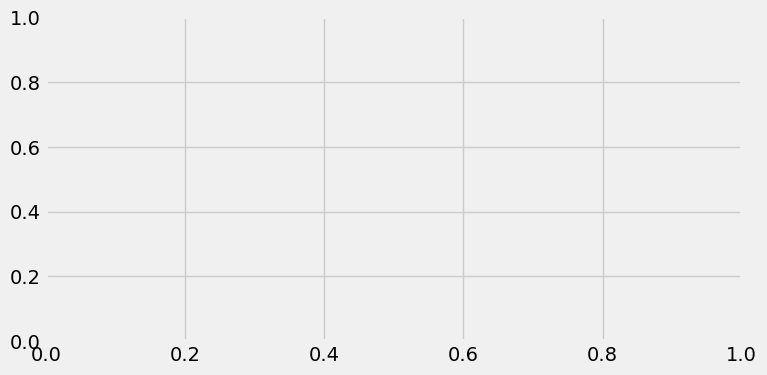

<Figure size 640x480 with 0 Axes>

In [4]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

xvals = []
yvals = []

index = count()

fig, ax = plt.subplots(figsize=(8, 4))  # Create a figure and axis for the plot

def animate(i):
    xvals.append(next(index))
    yvals.append(random.randint(0, 7))

    ax.clear()
    ax.plot(xvals, yvals)
    ax.set_title('Live Random Data')  # Set title for the plot

MAX_FRAMES = 100  # Example maximum number of frames
ani = FuncAnimation(fig, animate, frames=None, interval=1000, save_count=MAX_FRAMES)
plt.show()
plt.tight_layout()




Creating a Port To allow a data stream to run through it


In [ ]:
import socket
import threading

bufsize = 1024
targetHost = "192.1.1.2"  # Replace with the target IP address
listenPort = 8788

def forward(data, port):
    print(f"Forwarding: '{data}' from port {port}")

def handle_client(client_socket):
    while True:
        data = client_socket.recv(bufsize)
        if not data:
            break  # Connection closed by client
        forward(data.decode('utf-8'), listenPort)
    client_socket.close()

# Set up a socket to listen on the specified port
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_socket.bind((socket.gethostname(), listenPort))
server_socket.listen(5)

print(f"Listening on port {listenPort}...")

while True:
    client_socket, addr = server_socket.accept()
    client_thread = threading.Thread(target=handle_client, args=(client_socket,))
    client_thread.start()

Listening on port 8788...


Writing a code to create a server


In [ ]:
import socket
import threading

# Function to handle client connections
def handle_client(client_socket, address):
    print(f"Accepted connection from {address}")

    while True:
        # Receive data from the client
        data = client_socket.recv(1024)
        if not data:
            break

        # Perform real-time data analysis
        # Replace this with your actual data analysis logic
        processed_data = data.decode().upper()

        # Send back the processed data (optional)
        client_socket.send(processed_data.encode())

    print(f"Connection from {address} closed")
    client_socket.close()

# Server configuration
SERVER_HOST = '0.0.0.0'  # Listen on all network interfaces
SERVER_PORT = 12345  # Choose a port number for your server

# Create a TCP socket
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Bind the socket to the address and port
server_socket.bind((SERVER_HOST, SERVER_PORT))

# Start listening for incoming connections
server_socket.listen(5)
print(f"[*] Listening on {SERVER_HOST}:{SERVER_PORT}")

try:
    while True:
        # Accept incoming connections
        client_socket, address = server_socket.accept()

        # Start a new thread to handle the client
        client_thread = threading.Thread(target=handle_client, args=(client_socket, address))
        client_thread.start()

except KeyboardInterrupt:
    print("\n[*] Server shutting down.")
finally:
    # Close the server socket
    server_socket.close()


[*] Listening on 0.0.0.0:12345


In [ ]:
import socket
import threading

# Function to handle client connections
def handle_client(client_socket, address):
    print(f"Accepted connection from {address}")

    try:
        while True:
            # Receive data from the client
            data = client_socket.recv(1024)
            if not data:
                break

            # Process the received data
            processed_data = process_data(data)

            # Example: Print the processed data
            print(f"Processed data from {address}: {processed_data}")

    except Exception as e:
        print(f"Exception occurred with {address}: {str(e)}")
    finally:
        print(f"Connection from {address} closed")
        client_socket.close()

# Function to process incoming data (replace with your actual data analysis logic)
def process_data(data):
    return data.decode().strip()  # Example: Echo back the received data

# Server configuration
SERVER_HOST = '0.0.0.0'  # Listen on all network interfaces
SERVER_PORT = 12345  # Choose a port number for your server

# Create a TCP socket
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Bind the socket to the address and port
server_socket.bind((SERVER_HOST, SERVER_PORT))

# Start listening for incoming connections
server_socket.listen(5)
print(f"[*] Listening on {SERVER_HOST}:{SERVER_PORT}")

try:
    while True:
        # Accept incoming connections
        client_socket, address = server_socket.accept()

        # Start a new thread to handle the client
        client_thread = threading.Thread(target=handle_client, args=(client_socket, address))
        client_thread.start()

except KeyboardInterrupt:
    print("\n[*] Server shutting down.")
finally:
    # Close the server socket
    server_socket.close()


writing a code for client 
(modify it later while connecting)

In [ ]:
import socket
import time

# Server address and port
SERVER_HOST = '127.0.0.1'  # Replace with server's IP address or hostname
SERVER_PORT = 12345         # Replace with server's port number

import socket

# Function to simulate data generation (replace with your actual data source)
def generate_data():
    return "Hello, server!"


# Example usage:
received_data = receive_data()
print(f"Received data from Ethernet: {received_data}")


# Create a TCP socket
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

try:
    # Connect to the server
    client_socket.connect((SERVER_HOST, SERVER_PORT))
    print(f"[*] Connected to {SERVER_HOST}:{SERVER_PORT}")

    # Simulate sending data in a loop
    while True:
        data = generate_data()
        client_socket.sendall(data.encode())
        print(f"Sent data to server: {data}")
        time.sleep(1)  # Simulate some delay between data transmissions

except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    # Close the connection
    client_socket.close()
    print("[*] Connection closed.")


In [4]:
import socket

# Server (Laptop A) configuration
SERVER_IP = '192.168.1.100'  # Replace with Laptop A's IP address
SERVER_PORT = 12345  # Same port number used by the server

# Data to be sent
message = "Hello, Laptop A!"

# Create a socket object
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the server
client_socket.connect((SERVER_IP, SERVER_PORT))

# Send data to the server
client_socket.sendall(message.encode())

# Receive data from the server
received_data = client_socket.recv(1024)  # Buffer size 1024 bytes

print(f"Received from server (Laptop A): {received_data.decode()}")

# Close the connection
client_socket.close()


TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [7]:
import socket

# Server (Laptop A) configuration
SERVER_IP = '192.168.1.100'  # Replace with Laptop A's correct IP address
SERVER_PORT = 12345  # Same port number used by the server

# Data to be sent
message = "Hello, Laptop A!"

# Create a socket object
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the server
client_socket.connect((SERVER_IP, SERVER_PORT))

# Send data to the server
client_socket.sendall(message.encode())

# Receive data from the server
received_data = client_socket.recv(1024)  # Buffer size 1024 bytes

print(f"Received from server (Laptop A): {received_data.decode()}")

# Close the connection
client_socket.close()
import socket

# Server configuration
SERVER_IP = '192.168.1.100'  # Replace with Laptop A's correct IP address
SERVER_PORT = 12345  # Choose a port number that is not in use

# Create a socket object
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

try:
    # Bind the socket to the IP address and port
    server_socket.bind((SERVER_IP, SERVER_PORT))
except OSError as e:
    print(f"Error: {e}")
    exit(1)

# Listen for incoming connections (max queue of 5)
server_socket.listen(5)

print(f"Server (Laptop A) is listening on {SERVER_IP}:{SERVER_PORT}...")

# Accept incoming connection
client_socket, client_address = server_socket.accept()

print(f"Connection established with {client_address}")

# Receive data from the client
while True:
    data = client_socket.recv(1024)  # Buffer size 1024 bytes
    if not data:
        break
    print(f"Received from client: {data.decode()}")

    # Echo back the received data
    client_socket.sendall(data)

# Close the connection
client_socket.close()
server_socket.close()



TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [ ]:
import socket
import threading
import time

BACKLOG = 0
IP_ADDR = '192.168.1.76'
PORT = 8888
MAXLEN = 1

cliarray = []
data = []
cli_count = 0

def send_message(s, sock):
    for client_sock in cliarray:
        if client_sock != sock:
            client_sock.send(s.encode())

def send_message_all(s):
    for client_sock in cliarray:
        client_sock.send(s.encode())

def handle_conn(client_sock):
    global cli_count
    global data
    
    while True:
        client_msg = client_sock.recv(MAXLEN).decode()
        current_time = int(round(time.time() * 1000))
        
        if not client_msg:
            break
        
        client_int = ord(client_msg)
        send_message(client_msg, client_sock)
        milliseconds_sent = int(round(time.time() * 1000))
        
        row = [client_int, current_time, milliseconds_sent, len(client_msg)]
        data.append(row)
        
        if client_int == 100:
            break
    
    print(f"Connection closed: {client_sock}")
    cli_count -= 1
    client_sock.close()

def main():
    global BACKLOG
    global cli_count
    
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    
    try:
        sock.bind((IP_ADDR, PORT))
        sock.listen()
        print(f"Listening on {IP_ADDR}:{PORT}")
        
        BACKLOG = int(input("Enter # clients: "))
        filename = input("Enter name of text file (num clients - trial #).txt: ")
        
        running = True
        while running:
            client_sock, addr = sock.accept()
            print(f"Got a connection from {addr}")
            cli_count += 1
            cliarray.append(client_sock)
            
            if cli_count == BACKLOG:
                print("Max clients reached")
                running = False
        
        with open(filename, 'a') as frout:
            frout.write("recv \ttime recv (ms) \ttime sent (ms) \tlength of msg\n")
        
        mesg = chr(cli_count)
        send_message_all(mesg)
        print(f"Length of mesg: {len(mesg)}")
        
        threads = []
        for client_sock in cliarray:
            thread = threading.Thread(target=handle_conn, args=(client_sock,))
            threads.append(thread)
            thread.start()
        
        print("Created threads")
        
        for thread in threads:
            thread.join()
        
        print("Joined send/recv threads")
        
        with open(filename, 'a') as frout:
            for row in data:
                frout.write(f"{row[0]}\t{row[1]}\t{row[2]}\t{row[3]}\n")
    
    except Exception as e:
        print(f"Error: {e}")
    
    finally:
        for client_sock in cliarray:
            client_sock.close()
        sock.close()

if __name__ == "__main__":
    main()
import socket
import time

IP_ADDR = '192.168.1.214'
PORT = 8888
MAXLEN = 1

def main():
    try:
        client_sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        client_sock.connect((IP_ADDR, PORT))
        
        while True:
            message = input("Enter message to send (or 'exit' to quit): ")
            
            if message.lower() == 'exit':
                break
            
            client_sock.send(message.encode())
            print("Message sent.")
            
            response = client_sock.recv(MAXLEN).decode()
            print(f"Received response: {response}")
        
        client_sock.close()
    
    except Exception as e:
        print(f"Error: {e}")
        if client_sock:
            client_sock.close()

if __name__ == "__main__":
    main()




Error: [WinError 10049] The requested address is not valid in its context


Enter message to send (or 'exit' to quit):  70


Message sent.


In [ ]:
import socket

# Create a socket object
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Bind the socket to a host and port
server_host = 'localhost'
server_port = 12345  # Choose any port that is not currently in use
server_socket.bind((server_host, server_port))

# Listen for incoming connections
server_socket.listen(5)
print(f"Server is listening on {server_host}:{server_port}")

# Accept a client connection
client_socket, client_address = server_socket.accept()
print(f"Connected to {client_address}")

try:
    # Receive and process data continuously
    while True:
        # Receive data from the client
        data = client_socket.recv(1024)  # Receive up to 1024 bytes of data
        if not data:
            break  # If no data is received, break the loop

        # Process the received data (e.g., print or analyze)
        print(f"Received data from client: {data.decode()}")

         response = "Data received successfully"
         client_socket.sendall(response.encode())

except KeyboardInterrupt:
    print("Keyboard interrupt received. Closing server.")

finally:
    # Close the client socket
    client_socket.close()

    # Close the server socket
    server_socket.close()





In [ ]:
import socket
import time

# Create a socket object
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the server
server_host = 'localhost'
server_port = 12345  # Match the server's listening port
client_socket.connect((server_host, server_port))

try:
    # Send and receive data continuously
    while True:
        # Generate some data (e.g., timestamp)
        data = f"Data packet sent at {time.strftime('%Y-%m-%d %H:%M:%S')}"

        # Send data to the server
        client_socket.sendall(data.encode())

        # Receive response from the server
        response = client_socket.recv(1024)
        print(f"Received response from server: {response.decode()}")

        # Sleep for a short interval (simulate real-time data sending)
        time.sleep(1)

except KeyboardInterrupt:
    print("Keyboard interrupt received. Closing client.")

finally:
    # Close the client socket
    client_socket.close()


In [1]:
import socket
import struct

# Create a raw socket (requires root/admin privileges)
server_socket = socket.socket(socket.AF_PACKET, socket.SOCK_RAW)

# Set the network interface (replace 'eth0' with your interface name)
interface = 'eth0'
server_socket.bind((interface, 0))

try:
    while True:
        # Construct your Ethernet frame here
        ethernet_frame = b'\x00\x01\x02\x03\x04\x05'  # Example: Ethernet destination MAC address
        ethernet_frame += b'\x06\x07\x08\x09\x0A\x0B'  # Ethernet source MAC address
        ethernet_frame += b'\x08\x00'  # Ethernet type (IP)

        # Send the raw Ethernet frame
        server_socket.send(ethernet_frame)

except KeyboardInterrupt:
    print("Keyboard interrupt received. Closing server.")

finally:
    # Close the raw socket
    server_socket.close()


AttributeError: module 'socket' has no attribute 'AF_PACKET'

In [2]:
import socket
import struct

# Create a raw socket (requires root/admin privileges)
client_socket = socket.socket(socket.AF_PACKET, socket.SOCK_RAW, socket.ntohs(0x0003))

try:
    while True:
        # Receive the raw Ethernet frame
        raw_data, addr = client_socket.recvfrom(65536)

        # Extract Ethernet header (14 bytes)
        ethernet_header = raw_data[:14]
        ethertype = struct.unpack('!H', ethernet_header[12:14])[0]

        if ethertype == 0x0800:  # IPv4 ethertype
            # Further process the IPv4 packet (if needed)
            ip_header = raw_data[14:34]  # Example: Extracting IP header

        # Print raw data (for illustration purposes)
        print(f"Received raw Ethernet data: {raw_data.hex()}")

except KeyboardInterrupt:
    print("Keyboard interrupt received. Closing client.")

finally:
    # Close the raw socket
    client_socket.close()


AttributeError: module 'socket' has no attribute 'AF_PACKET'

In [4]:
# server.py
import socket

SERVER_INTERFACE_NAME = "eth0"  # Replace with your actual interface name

# Create a raw socket
with socket.socket(socket.AF_PACKET, socket.SOCK_RAW, socket.IPPROTO_RAW) as server_socket:
    server_socket.bind((SERVER_INTERFACE_NAME, 0))  # Bind to the interface

    # Construct your Ethernet frame (replace with actual data)
    destination_mac = b"\x00\x11\x22\x33\x44\x55"  # Destination MAC address
    source_mac = b"\x66\x77\x88\x99\xaa\xbb"  # Source MAC address
    transport_protocol = b"\x08\x00"  # IPv4 protocol
    data = b"Your raw Ethernet data here"

    ethernet_frame = destination_mac + source_mac + transport_protocol + data

    # Send the frame to the client (replace client details)
    client_mac = b"\xcc\xdd\xee\xff\x00\x11"
    server_socket.sendto(ethernet_frame, (client_mac, 0))

    print("Raw Ethernet frame sent to client.")

# Create a raw socket
with socket.socket(socket.AF_PACKET, socket.SOCK_RAW, socket.IPPROTO_RAW) as server_socket:
    server_socket.bind((SERVER_INTERFACE_NAME, 0))  # Bind to the interface

    # Construct your Ethernet frame (replace with actual data)
    destination_mac = b"\x00\x11\x22\x33\x44\x55"  # Destination MAC address
    source_mac = b"\x66\x77\x88\x99\xaa\xbb"  # Source MAC address
    transport_protocol = b"\x08\x00"  # IPv4 protocol
    data = b"Your raw Ethernet data here"

    ethernet_frame = destination_mac + source_mac + transport_protocol + data

    # Send the frame to the client (replace client details)
    client_mac = b"\xcc\xdd\xee\xff\x00\x11"
    server_socket.sendto(ethernet_frame, (client_mac, 0))

    print("Raw Ethernet frame sent to client.")






AttributeError: module 'socket' has no attribute 'AF_PACKET'

In [5]:
# client.py
import socket

HOST = "127.0.0.1"  # Server's IP address (replace with the actual server IP)
PORT = 12345  # Port to connect to (adjust as needed)

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as client_socket:
    client_socket.connect((HOST, PORT))  # Connect to the server

    received_data = client_socket.recv(1024)  # Receive data (adjust buffer size as needed)
    print(f"Received from server: {received_data.decode()}")  # Process the received data


ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [ ]:
import socket

def start_server(host='127.0.0.1', port=65432):
    try:
        server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        server_socket.bind((host, port))
        server_socket.listen(5)  # Listen for incoming connections (backlog of 5)

        print(f'Server started at {host}:{port}, waiting for a connection...')

        while True:
            conn, addr = server_socket.accept()  # Accept incoming connection
            print(f'Connected by {addr}')

            # Handle client request (echo back data for demonstration)
            data = conn.recv(1024)  # Receive data from client
            if not data:
                break

            print(f"Received data from client: {data.decode()}")
            conn.sendall(data)  # Echo back the received data

            conn.close()  # Close the connection

    except Exception as e:
        print(f"Server error: {e}")
    finally:
        server_socket.close()

# Start the server
start_server()


Server started at 127.0.0.1:65432, waiting for a connection...


In [1]:
import socket

def start_client(host='127.0.0.1', port=65432):
    try:
        client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        client_socket.connect((host, port))
        print(f'Connected to server at {host}:{port}')

        # Send data to server (replace with your Ethernet data handling logic)
        message = "Hello, server!"
        client_socket.sendall(message.encode())

        # Receive response from server
        data = client_socket.recv(1024)
        print(f"Received from server: {data.decode()}")

    except Exception as e:
        print(f"Client error: {e}")
    finally:
        client_socket.close()

# Start the client
start_client()


Connected to server at 127.0.0.1:65432
Received from server: Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website



In [ ]:
import socket
import threading
import time
import random

def generate_random_data():
    """Generate random Ethernet-like data."""
    data = bytes(random.getrandbits(8) for _ in range(64))  # 64 bytes of random data
    return data

def handle_client_connection(conn):
    try:
        while True:
            data = generate_random_data()
            print(f"Sending data: {data.hex()}")
            conn.sendall(data)
            time.sleep(1)  # Send data every second
    except Exception as e:
        print(f"Error: {e}")
    finally:
        conn.close()

def start_server(host='', port=64538):
    try:
        server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        server_socket.bind((host, port))
        server_socket.listen(5)  # Listen for incoming connections (backlog of 5)
        print(f'Server started at {host}:{port}, waiting for a connection...')

        while True:
            conn, addr = server_socket.accept()  # Accept incoming connection
            print(f'Connected by {addr}')
            client_thread = threading.Thread(target=handle_client_connection, args=(conn,))
            client_thread.start()

    except Exception as e:
        print(f"Server error: {e}")
    finally:
        server_socket.close()

# Start the server
start_server()
